# `Jenny Cosmetics Store Report`

<h1 style= "text-align: center;color: green#4CAF50;"Jenny Cosmetics Store Report</h1>

In [2]:
# import the Libraries
import pandas as pd 
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the dataset 
df = pd.read_csv(r"C:\Users\dell\Downloads\cosmetics.csv") 
#check the first 5 rows of the dataset 
df.head()

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped
0,Lucas Verma,Canada,Aloe Vera Gel,2022-04-30,7897.13,358
1,Ethan Reddy,UK,Aloe Vera Gel,2022-01-25,16376.88,449
2,Ananya Gupta,India,Body Butter Cream,2022-08-22,5599.68,264
3,Ananya Gupta,New Zealand,Salicylic Acid Cleanser,2022-08-26,2966.47,144
4,Sophia Nair,UK,Body Butter Cream,2022-05-19,6828.68,484


In [4]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   374 non-null    object 
 1   Country        374 non-null    object 
 2   Product        374 non-null    object 
 3   Date           374 non-null    object 
 4   Amount ($)     374 non-null    float64
 5   Boxes Shipped  374 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 17.7+ KB


## Data Cleaning

In [5]:
# check for null values
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount ($)       0
Boxes Shipped    0
dtype: int64

In [6]:
# check for duplicate
df.duplicated().sum()


0

In [7]:
# convert date to python datetime
df['Date'] = pd.to_datetime(df['Date'])

# `EXPLORATORY DATA ANALYSIS`

In [8]:
# PERFORM STATS ANALYSIS
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,374,2022-05-04 00:38:30.160427776,2022-01-01 00:00:00,2022-03-15 00:00:00,2022-05-02 00:00:00,2022-06-28 18:00:00,2022-08-30 00:00:00,NaN
Amount ($),374.0,7778.353262,119.82,3325.25,6513.655,11331.8975,23977.48,5655.378093
Boxes Shipped,374.0,249.072193,10.0,140.0,246.0,364.0,499.0,144.235296


In [9]:
# check countries with branches
df['Country'].value_counts()

Country
USA            75
New Zealand    73
Australia      70
UK             61
India          48
Canada         47
Name: count, dtype: int64

In [10]:
# check product category
df['Product'].unique().tolist()

['Aloe Vera Gel',
 'Body Butter Cream',
 'Salicylic Acid Cleanser',
 'Lip Balm Pack',
 'Rose Water Toner',
 'Tea Tree Moisturizer',
 'Face Sheet Masks',
 'Hair Repair Oil',
 'Vitamin C Cream',
 'Niacinamide Toner',
 'Under Eye Cream',
 'Hydrating Face Serum',
 'Charcoal Face Wash',
 'Anti-Aging Serum',
 'SPF 50 Sunscreen']

In [11]:
# How many sales does Jenny have?
df['Sales Person'].unique().tolist()

['Lucas Verma',
 'Ethan Reddy',
 'Ananya Gupta',
 'Sophia Nair',
 'Isabella Roy',
 'Noah Mehta',
 "Olivia D'Souza",
 'Ava Sharma',
 'Liam Patel',
 'Mason Kapoor']

### Sales performance overview

In [12]:
# sales performance in terms of total sales by sales person
perf = df.groupby('Sales Person')[['Amount ($)','Boxes Shipped']].sum().sort_values(by='Amount ($)',ascending=False)
perf


,Amount ($),Boxes Shipped
Sales Person,,
Olivia D'Souza,387405.91,12619
Sophia Nair,319887.82,10473
Isabella Roy,302087.60,9116
Ethan Reddy,298595.61,8814
Lucas Verma,295166.91,9330
Ananya Gupta,293204.67,9669
Noah Mehta,272188.08,9403
Liam Patel,270960.55,8513
Ava Sharma,246174.28,7849


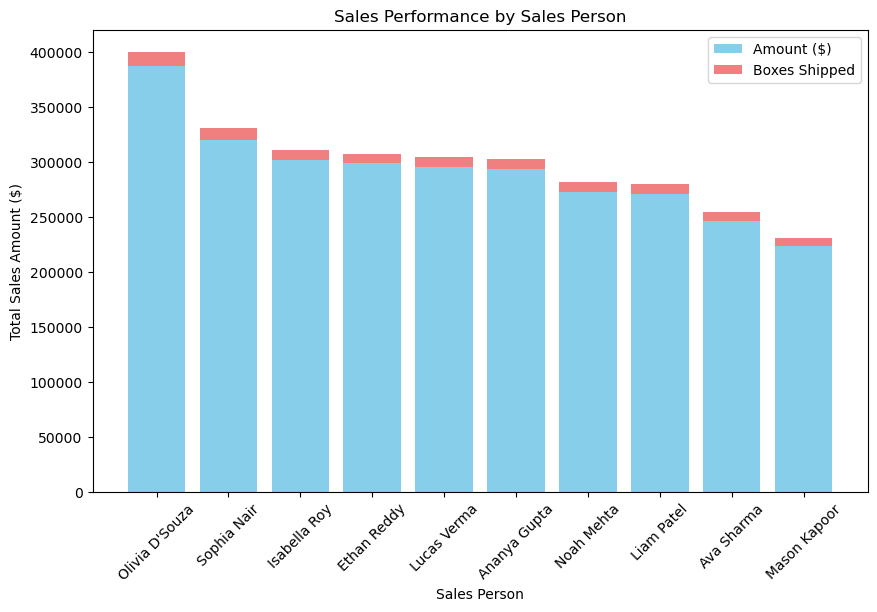

In [13]:
# plot the sales performace chart in stacked bar format
plt.figure(figsize=(10,6))
plt.bar(perf.index,perf['Amount ($)'],color='skyblue',label='Amount ($)')
plt.bar(perf.index, perf['Boxes Shipped'], color='lightcoral', bottom=perf['Amount ($)'], label='Boxes Shipped')
plt.xlabel("Sales Person")
plt.ylabel("Total Sales Amount ($)")
plt.title("Sales Performance by Sales Person") 
plt.xticks(rotation=45)
plt.legend()
plt.show()

### `Total Sales PernCountry By Sales Person`

In [14]:
# TOTAL SALES PER COUNTRY
con = df.groupby(['Country'])['Amount ($)'].sum().sort_values(ascending=False)
con

Country
USA            628487.86
New Zealand    557059.85
Australia      505497.64
UK             497061.54
Canada         374562.31
India          346434.92
Name: Amount ($), dtype: float64

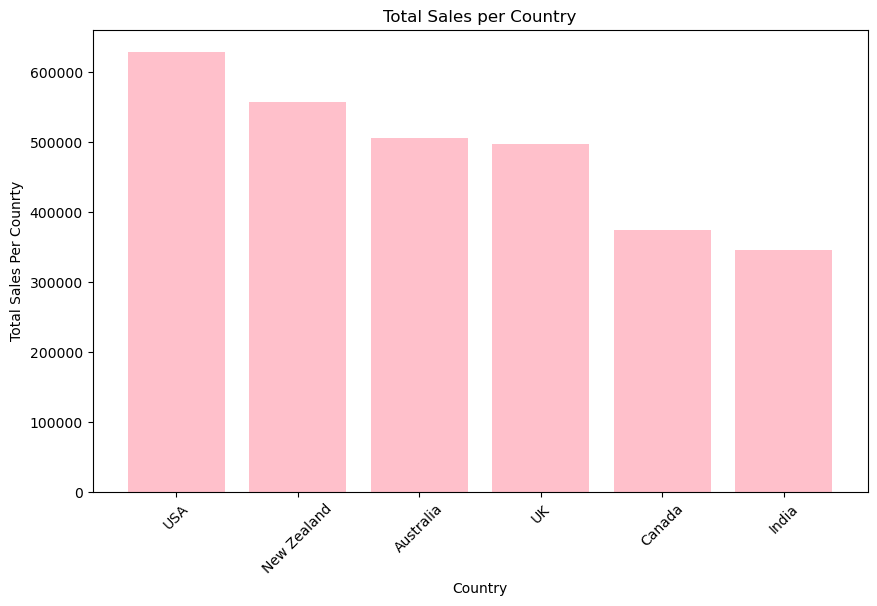

In [15]:
# plot the total sales per country
plt.figure(figsize=(10,6))
plt.bar(con.index, con.values, color='pink',)
plt.title("Total Sales per Country")
plt.xlabel("Country")
plt.ylabel("Total Sales Per Counrty")
plt.xticks(rotation=45)
plt.show()

# Monthly Sales Performance

In [16]:
# monthly sales performance
# create a month column and extract the month from date
df['Month'] = df['Date'].dt.to_period('M')


In [17]:
# extract month name from date
df['Month'] =df['Date'].dt.month_name()
# check
df.head()

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped,Month
0,Lucas Verma,Canada,Aloe Vera Gel,2022-04-30,7897.13,358,April
1,Ethan Reddy,UK,Aloe Vera Gel,2022-01-25,16376.88,449,January
2,Ananya Gupta,India,Body Butter Cream,2022-08-22,5599.68,264,August
3,Ananya Gupta,New Zealand,Salicylic Acid Cleanser,2022-08-26,2966.47,144,August
4,Sophia Nair,UK,Body Butter Cream,2022-05-19,6828.68,484,May


In [18]:
# extract year from date
df['Year'] = df['Date'].dt.year
# check
df.head()

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped,Month,Year
0,Lucas Verma,Canada,Aloe Vera Gel,2022-04-30,7897.13,358,April,2022
1,Ethan Reddy,UK,Aloe Vera Gel,2022-01-25,16376.88,449,January,2022
2,Ananya Gupta,India,Body Butter Cream,2022-08-22,5599.68,264,August,2022
3,Ananya Gupta,New Zealand,Salicylic Acid Cleanser,2022-08-26,2966.47,144,August,2022
4,Sophia Nair,UK,Body Butter Cream,2022-05-19,6828.68,484,May,2022


In [19]:
#  check year period
df['Year'].nunique()

1

In [20]:
# group sales by month
trend = df.groupby('Month')['Amount ($)'].sum().sort_values(ascending=False)
trend

Month
March       484101.59
April       452650.04
May         396609.09
June        367001.65
January     359762.51
July        359655.73
August      275298.95
February    214024.56
Name: Amount ($), dtype: float64

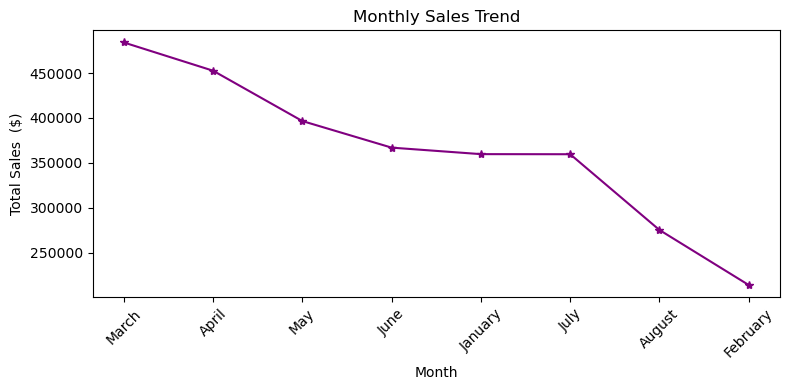

In [21]:
# plot info in chart
plt.figure(figsize=(8,4))
plt.plot(trend.index, trend.values, marker='*', linestyle='-', color='purple')
plt.xlabel("Month")
plt.ylabel("Total Sales  ($)")
plt.title("Monthly Sales Trend") 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### `Top Product Analysis`

In [22]:
# Top selling product by country
top_products = df.groupby(['Country', 'Product'])['Amount ($)'].sum().reset_index()
top_products = top_products.sort_values(by=['Country', 'Amount ($)'], ascending=[True,False])
top_products = top_products.groupby('Country').head(1)
top_products  

,Country,Product,Amount ($)
5,Australia,Hair Repair Oil,91002.87
28,Canada,Under Eye Cream,59336.49
31,India,Anti-Aging Serum,39111.02
55,New Zealand,SPF 50 Sunscreen,87897.03
66,UK,Hydrating Face Serum,75719.24
76,USA,Anti-Aging Serum,113821.81


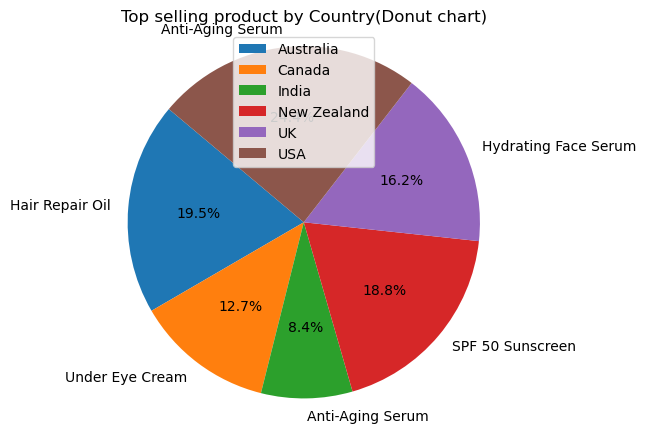

In [23]:
# plot a donut chart for top product by country
plt.figure(figsize=(5,5))
plt.pie(top_products['Amount ($)'], labels=top_products['Product'], autopct= '%1.1f%%', startangle=140)
plt.axis("equal") # equal aspect ratio ensures that pie is drawn as a circle
plt.title("Top selling product by Country(Donut chart)") 
plt.legend(top_products['Country'])
plt.show()

### `KPIs'

In [24]:
# measur KPIs
kpi = {
     'Total Sales': df['Amount ($)'].sum(),
     'Total Boxes Shipped': df['Boxes Shipped'].sum(),
     'Unique Products Sold': df['Product'].nunique(),
     'Total Countries': df['Country'].nunique(),
     'Total Sales Persons': df['Sales Person'].nunique()
}

In [25]:
kpi.items()

dict_items([('Total Sales', 2909104.12), ('Total Boxes Shipped', 93153), ('Unique Products Sold', 15), ('Total Countries', 6), ('Total Sales Persons', 10)])

In [26]:
for key, value in kpi.items():
    print(key,value)

Total Sales 2909104.12
Total Boxes Shipped 93153
Unique Products Sold 15
Total Countries 6
Total Sales Persons 10
